In [61]:
import matplotlib.pyplot as plt

from obspy.clients.fdsn.client import Client
from obspy import UTCDateTime
from obspy.core.event import Catalog
from obspy.core.stream import Stream
from obspy.core.event import Event
from obspy.core.event import Origin
from obspy.core.event import Magnitude
from obspy import read_events
from obspy import read_inventory
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import pickle


In [63]:
catINGV=read_events('flegrei_2014_2023_INGV/catalogue_flegrei.xml')

In [62]:
catOV=read_events('flegrei_2014_2023_GOSSIP/catalogue_flegrei.xml')

## Compare if an event in the INGV catalogue is present in the GOSSIP catalogue (one or more times)

In [4]:
id_catalogues=[]

for ind,ev in enumerate(catINGV):
    
    origin_time = ev.origins[0].time
    time_min= 'time > ' + str(origin_time - 5)
    time_max= 'time < ' + str(origin_time + 5)
    cat= catOV.filter(time_min , time_max)

    id_catalogues.append([])
    id_catalogues[ind].append( int( str(ev.resource_id).split('=')[1] ) )

    for match in cat:
        id_catalogues[ind].append( int( str(match.resource_id).split('/')[1] ) )

id_catalogues

[[37197101, 31995],
 [37130751, 31962],
 [37089611, 31936],
 [36963461, 31861],
 [36961611, 31857],
 [36961311, 31855],
 [36961211, 31853],
 [36961201, 31852],
 [36956101, 31838],
 [36955751, 31832],
 [36955741, 31831],
 [36955731, 31833],
 [36955691, 31829],
 [36951941, 31823],
 [36951891, 31821],
 [36950591, 31820],
 [36944171, 31819],
 [36846841, 31723],
 [36833201, 31717, 31718],
 [36794721, 31670],
 [36758731, 31666],
 [36755891, 31664],
 [36748281, 31646],
 [36701861, 31636],
 [36701841, 31633],
 [36697331, 31624],
 [36692381, 31619],
 [36624321, 31594],
 [36614161, 31592],
 [36613631, 31591],
 [36609981, 31587],
 [36605511, 31584],
 [36603661, 31583],
 [36565471, 31551],
 [36560281, 31549],
 [36559121, 31547],
 [36529181, 31501],
 [36520811, 31476],
 [36520801, 31575, 31475],
 [36521131, 31483],
 [36520991, 31481],
 [36520981, 31480],
 [36520771, 31477],
 [36520871, 31478],
 [36520821, 31474],
 [36520181, 31471],
 [36510951, 31459],
 [36499161, 31411],
 [36495931, 31390],
 [3649

## save

In [5]:
with open("event_comparison_INGV_GOSSIP", "wb") as fp:   #Pickling
    pickle.dump(id_catalogues, fp)

## load

In [7]:
with open("event_comparison_INGV_GOSSIP", "rb") as fp:   # Unpickling
    catalogues = pickle.load(fp)

In [21]:
ev_not_found=[]
ev_multiple_det=[]

for ev in catalogues:
    if len(ev)   >= 3:
        ev_multiple_det.append(ev)
    elif len(ev) == 1:
        ev_not_found.append(ev)
    elif len(ev) != 2:
        print('!event not categorized!')

In [24]:
print('number of events present in the INGV catalogue but not in the GOSSIP catalogue:',len(ev_not_found))
print(ev_not_found)
print('(FIRST NUMBER IS THE INGV ID, OTHERS ARE THE GOSSIP ID)')

number of events present in the INGV catalogue but not in the GOSSIP catalogue: 11
[[36347421], [36318421], [35119061], [33686281], [27435061], [24523531], [24415911], [22438881], [6925231], [6783751], [6301551]]
(FIRST NUMBER IS THE INGV ID, OTHERS ARE THE GOSSIP ID)


In [23]:
print('number of events present in the INGV catalogue and present multiple times in the GOSSIP catalogue:',len(ev_multiple_det))
print(ev_multiple_det)

number of events present in the INGV catalogue and present multiple times in the GOSSIP catalogue: 25
[[36833201, 31717, 31718], [36520801, 31575, 31475], [36361161, 31275, 30889], [36308421, 30569, 31095], [36284971, 30962, 30396], [35901131, 29517, 29048], [35882751, 29560, 29004], [35872541, 29652, 28923], [35827991, 28675, 29246], [35736521, 29420, 28455], [35317431, 26357, 26356], [35317131, 26297, 26290], [35009791, 25518, 25519], [34689631, 24645, 24688], [34172651, 23551, 23542], [33547701, 17821, 17747], [32238931, 16415, 16472], [28881041, 13052, 6090], [26823581, 5280, 13688], [25916061, 14581, 4496], [25827491, 4350, 4395], [25817161, 4350, 4395], [25494111, 3876, 11987], [22029011, 1345, 1344], [19726281, 10027, 10026, 381]]


In [60]:
cat_miss=Catalog()
cat_multiple=Catalog()

for ind,ev in enumerate(catINGV):
    
    for miss in ev_not_found:
        if str(miss[0])==ev.resource_id.id.split('=')[1]:
            cat_miss += ev

    for multiple in ev_multiple_det:
        if str(multiple[0])==ev.resource_id.id.split('=')[1]:
            cat_multiple += ev

print(cat_miss.__str__(print_all=True))
print(cat_multiple.__str__(print_all=True))

11 Event(s) in Catalog:
2023-10-01T01:18:54.900000Z | +40.831,  +14.152 | 1.4  Md | manual
2023-09-28T18:01:26.839000Z | +40.812,  +14.101 | 1.0  Md | manual
2023-05-29T03:02:27.000000Z | +40.802,  +14.117 | 1.2  Md | manual
2022-12-19T16:18:08.849000Z | +40.819,  +14.120 | 1.2  Md | manual
2021-07-08T08:57:08.210000Z | +40.788,  +14.106 | 1.7  ML | manual
2020-05-28T18:47:30.760000Z | +40.821,  +14.097 | 1.5  Md | manual
2020-05-13T18:15:13.690000Z | +40.825,  +14.099 | 1.4  Md | manual
2019-06-12T00:30:45.460000Z | +40.836,  +14.092 | 1.7  Md | manual
2016-07-11T05:10:00.000000Z | +40.796,  +14.102 | 1.5  Md | manual
2016-06-04T02:38:00.000000Z | +40.817,  +14.136 | 1.5  Md | manual
2015-12-12T14:04:00.000000Z | +40.824,  +14.140 | 0.3  M  | manual
25 Event(s) in Catalog:
2023-11-10T17:51:58.279000Z | +40.827,  +14.142 | 1.3  Md | manual
2023-10-19T04:02:48.940000Z | +40.828,  +14.142 | 2.2  Md | manual
2023-10-02T09:05:38.509000Z | +40.831,  +14.143 | 1.2  Md | manual
2023-09-27T19:

# Stations

In [16]:
client=Client('INGV')

stime=UTCDateTime('2014-01-01T00:00:00')
etime=UTCDateTime('2024-01-01T00:00:00')

In [17]:
lat=40.8478
long=14.0918
rad_events=0.5
inv=client.get_stations(starttime=stime,endtime=etime,
                        latitude=lat,longitude=long,maxradius=rad_events,
                        level='response')                                   #instrumental response
inv

Inventory created at 2024-01-16T14:42:48.667000Z
	Created by: INGV-ONT WEB SERVICE: fdsnws-station | version: 1.1.57
		    /exist/apps/fdsn-station/fdsnws/station/1/query?starttime=2014-01-0...
	Sending institution: eXistDB (INGV-ONT)
	Contains:
		Networks (3):
			IV, IX, ZM
		Stations (49):
			IV.CAAM (Accademia Aeronautica Pozzuoli)
			IV.CAFL (Arco Felice)
			IV.CAWE (Astroni Ovest - Stazione Osservatorio Vesuviano)
			IV.CBAC (Campi Flegrei, Castello di Baia - Stazione Osservatorio Vesu)
			IV.CCAP (Capo Posillipo C. acqisiz. - Stazione Osservatorio Vesuviano)
			IV.CFMN (Monte Nuovo)
			IV.CMIS (Faro di Capo Miseno - Stazione Osservatorio Vesuviano)
			IV.CMSN (Monte S.Angelo)
			IV.CMTS (Campi Flegrei, Via Metastasio CNR-IRC)
			IV.CNIS (Campi Flegrei - Isola di Nisida)
			IV.COLB (Campi Flegrei, Galleria Monte Olibano, Stazione Osservatorio)
			IV.CPIS (Campi Flegrei - Fumarola Pisciarelli)
			IV.CPOZ (Darsena Pozzuoli - Stazione Osservatorio Vesuviano)
			IV.CQUE (Campi Flegrei

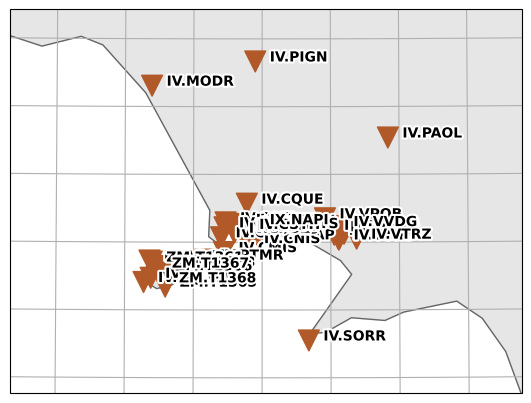

In [18]:
inv.plot(projection='local',resolution='h');

In [19]:
inv.write('flegrei_2014_2023_INGV/inventory_flegrei.xml',format='STATIONXML')                        #save

In [20]:
inv_f=read_inventory('flegrei_2014_2023_INGV/inventory_flegrei.xml')                                 #read

In [ ]:
#inv_f.plot_response(min_freq=1E-4,station='SORR',channel='[EH]H?');

# Waveform 

In [35]:
catOV_mag = catOV.filter("magnitude >= 2.5","magnitude < 3.")                       #CHANGE
print(catOV_mag)

35 Event(s) in Catalog:
2015-10-07T09:10:50.680000Z | +40.825,  +14.150 | 2.5  D 
2018-09-18T21:36:41.940000Z | +40.827,  +14.148 | 2.5  D 
...
2020-12-19T21:54:57.430000Z | +40.831,  +14.145 | 2.7  D 
2020-12-28T08:09:43.020000Z | +40.831,  +14.146 | 2.6  D 
To see all events call 'print(CatalogObject.__str__(print_all=True))'


In [33]:
#catOV_mag[0].resource_id.id.split('/')[1]

str

In [36]:
for ev in catOV_mag:
    origin_time=ev.origins[0].time
    evID=ev.resource_id.id.split('/')[1]
    print('event id: ',evID)
    print('origin time event:',origin_time)
    print('extimated magnitude:',ev.magnitudes[0].mag)


    event_start=origin_time -20
    event_end=origin_time +40

    wave=Stream()
    for network in inv_f:
        for  station in network.stations:
            try:
                wave += client.get_waveforms(starttime=event_start,endtime=event_end,
                                    network=network.code,station=station.code,location='*', channel='HH?',
                                    attach_response=True,)
            except:
                #print(station.code , 'station not recording')
                continue

    print('traces found:',len(wave.traces))

    '''
    wave.merge(fill_value=0)
    # trim over the [t1, t2] interval
    wave.trim(starttime=event_start, endtime=event_end, pad=True, fill_value=0)

    
    # remove trend
    wave.detrend("demean")
    
    #remove instrumental response
    pre_filt = [0.01, 0.1, 25,30]
    
    #remove instrumental response
    wave.remove_response(inventory=inv_f, output='DISP', pre_filt=pre_filt) #output=VEL ??
    '''

    wave.write('waveform/mag2_5/wave_'+ evID +'.mseed',format='MSEED')                  #CHANGE
    print('saved!')

event id:  4217
origin time event: 2015-10-07T09:10:50.680000Z
extimated magnitude: 2.5
traces found: 9
saved!
event id:  677
origin time event: 2018-09-18T21:36:41.940000Z
extimated magnitude: 2.5


/Users/giaco/Library/Python/3.9/lib/python/site-packages/obspy/io/mseed/core.py:821: UserWarning: File will be written with more than one different encodings.
This might have a negative influence on the compatibility with other programs.
  warnings.warn(msg % 'encodings')


traces found: 57
saved!
event id:  1159
origin time event: 2019-03-15T04:26:41.820000Z
extimated magnitude: 2.5


/Users/giaco/Library/Python/3.9/lib/python/site-packages/obspy/io/mseed/core.py:821: UserWarning: File will be written with more than one different encodings.
This might have a negative influence on the compatibility with other programs.
  warnings.warn(msg % 'encodings')


traces found: 57
saved!
event id:  2086
origin time event: 2019-10-05T05:08:37.760000Z
extimated magnitude: 2.5


/Users/giaco/Library/Python/3.9/lib/python/site-packages/obspy/io/mseed/core.py:821: UserWarning: File will be written with more than one different encodings.
This might have a negative influence on the compatibility with other programs.
  warnings.warn(msg % 'encodings')


traces found: 48
saved!
event id:  14885
origin time event: 2022-04-19T02:05:54.300000Z
extimated magnitude: 2.94


/Users/giaco/Library/Python/3.9/lib/python/site-packages/obspy/io/mseed/core.py:821: UserWarning: File will be written with more than one different encodings.
This might have a negative influence on the compatibility with other programs.
  warnings.warn(msg % 'encodings')


traces found: 66
saved!
event id:  16351
origin time event: 2022-07-30T03:27:48.930000Z
extimated magnitude: 2.51


/Users/giaco/Library/Python/3.9/lib/python/site-packages/obspy/io/mseed/core.py:821: UserWarning: File will be written with more than one different encodings.
This might have a negative influence on the compatibility with other programs.
  warnings.warn(msg % 'encodings')


traces found: 63
saved!
event id:  17434
origin time event: 2022-11-12T21:37:54.760000Z
extimated magnitude: 2.67


/Users/giaco/Library/Python/3.9/lib/python/site-packages/obspy/io/mseed/core.py:821: UserWarning: File will be written with more than one different encodings.
This might have a negative influence on the compatibility with other programs.
  warnings.warn(msg % 'encodings')


traces found: 72
saved!
event id:  17732
origin time event: 2022-11-30T02:34:39.010000Z
extimated magnitude: 2.53


/Users/giaco/Library/Python/3.9/lib/python/site-packages/obspy/io/mseed/core.py:821: UserWarning: File will be written with more than one different encodings.
This might have a negative influence on the compatibility with other programs.
  warnings.warn(msg % 'encodings')


traces found: 66
saved!
event id:  22730
origin time event: 2022-12-28T02:35:57.520000Z
extimated magnitude: 2.67


/Users/giaco/Library/Python/3.9/lib/python/site-packages/obspy/io/mseed/core.py:821: UserWarning: File will be written with more than one different encodings.
This might have a negative influence on the compatibility with other programs.
  warnings.warn(msg % 'encodings')


traces found: 75
saved!
event id:  23194
origin time event: 2023-01-19T08:44:30.190000Z
extimated magnitude: 2.59


/Users/giaco/Library/Python/3.9/lib/python/site-packages/obspy/io/mseed/core.py:821: UserWarning: File will be written with more than one different encodings.
This might have a negative influence on the compatibility with other programs.
  warnings.warn(msg % 'encodings')


traces found: 69
saved!
event id:  23338
origin time event: 2023-02-05T00:45:36.160000Z
extimated magnitude: 2.97


/Users/giaco/Library/Python/3.9/lib/python/site-packages/obspy/io/mseed/core.py:821: UserWarning: File will be written with more than one different encodings.
This might have a negative influence on the compatibility with other programs.
  warnings.warn(msg % 'encodings')


traces found: 72
saved!
event id:  23716
origin time event: 2023-03-04T13:15:20.410000Z
extimated magnitude: 2.6


/Users/giaco/Library/Python/3.9/lib/python/site-packages/obspy/io/mseed/core.py:821: UserWarning: File will be written with more than one different encodings.
This might have a negative influence on the compatibility with other programs.
  warnings.warn(msg % 'encodings')


traces found: 72
saved!
event id:  23904
origin time event: 2023-03-13T22:40:53.580000Z
extimated magnitude: 2.83


/Users/giaco/Library/Python/3.9/lib/python/site-packages/obspy/io/mseed/core.py:821: UserWarning: File will be written with more than one different encodings.
This might have a negative influence on the compatibility with other programs.
  warnings.warn(msg % 'encodings')


traces found: 78
saved!
event id:  24146
origin time event: 2023-03-24T05:24:43.090000Z
extimated magnitude: 2.59


/Users/giaco/Library/Python/3.9/lib/python/site-packages/obspy/io/mseed/core.py:821: UserWarning: File will be written with more than one different encodings.
This might have a negative influence on the compatibility with other programs.
  warnings.warn(msg % 'encodings')


traces found: 75
saved!
event id:  24479
origin time event: 2023-04-10T03:54:45.480000Z
extimated magnitude: 2.92


/Users/giaco/Library/Python/3.9/lib/python/site-packages/obspy/io/mseed/core.py:821: UserWarning: File will be written with more than one different encodings.
This might have a negative influence on the compatibility with other programs.
  warnings.warn(msg % 'encodings')


traces found: 69
saved!
event id:  24645
origin time event: 2023-04-15T05:54:37.220000Z
extimated magnitude: 2.63


/Users/giaco/Library/Python/3.9/lib/python/site-packages/obspy/io/mseed/core.py:821: UserWarning: File will be written with more than one different encodings.
This might have a negative influence on the compatibility with other programs.
  warnings.warn(msg % 'encodings')


traces found: 69
saved!
event id:  24688
origin time event: 2023-04-15T05:54:40.430000Z
extimated magnitude: 2.71


/Users/giaco/Library/Python/3.9/lib/python/site-packages/obspy/io/mseed/core.py:821: UserWarning: File will be written with more than one different encodings.
This might have a negative influence on the compatibility with other programs.
  warnings.warn(msg % 'encodings')


traces found: 69
saved!
event id:  25214
origin time event: 2023-05-08T22:33:17.410000Z
extimated magnitude: 2.69


/Users/giaco/Library/Python/3.9/lib/python/site-packages/obspy/io/mseed/core.py:821: UserWarning: File will be written with more than one different encodings.
This might have a negative influence on the compatibility with other programs.
  warnings.warn(msg % 'encodings')


traces found: 94
saved!
event id:  26290
origin time event: 2023-06-15T15:39:40.320000Z
extimated magnitude: 2.89


/Users/giaco/Library/Python/3.9/lib/python/site-packages/obspy/io/mseed/core.py:821: UserWarning: File will be written with more than one different encodings.
This might have a negative influence on the compatibility with other programs.
  warnings.warn(msg % 'encodings')


traces found: 75
saved!
event id:  28790
origin time event: 2023-08-18T00:01:28.290000Z
extimated magnitude: 2.67


/Users/giaco/Library/Python/3.9/lib/python/site-packages/obspy/io/mseed/core.py:821: UserWarning: File will be written with more than one different encodings.
This might have a negative influence on the compatibility with other programs.
  warnings.warn(msg % 'encodings')


traces found: 79
saved!
event id:  28871
origin time event: 2023-08-18T04:10:30.410000Z
extimated magnitude: 2.53


/Users/giaco/Library/Python/3.9/lib/python/site-packages/obspy/io/mseed/core.py:821: UserWarning: File will be written with more than one different encodings.
This might have a negative influence on the compatibility with other programs.
  warnings.warn(msg % 'encodings')


traces found: 81
saved!
event id:  29141
origin time event: 2023-08-27T21:14:23.450000Z
extimated magnitude: 2.61


/Users/giaco/Library/Python/3.9/lib/python/site-packages/obspy/io/mseed/core.py:821: UserWarning: File will be written with more than one different encodings.
This might have a negative influence on the compatibility with other programs.
  warnings.warn(msg % 'encodings')


traces found: 81
saved!
event id:  29830
origin time event: 2023-09-12T02:28:50.200000Z
extimated magnitude: 2.9


/Users/giaco/Library/Python/3.9/lib/python/site-packages/obspy/io/mseed/core.py:821: UserWarning: File will be written with more than one different encodings.
This might have a negative influence on the compatibility with other programs.
  warnings.warn(msg % 'encodings')


traces found: 78
saved!
event id:  30053
origin time event: 2023-09-20T22:54:29.079000Z
extimated magnitude: 2.7


/Users/giaco/Library/Python/3.9/lib/python/site-packages/obspy/io/mseed/core.py:821: UserWarning: File will be written with more than one different encodings.
This might have a negative influence on the compatibility with other programs.
  warnings.warn(msg % 'encodings')


traces found: 81
saved!
event id:  30310
origin time event: 2023-09-24T15:35:02.029000Z
extimated magnitude: 2.8


/Users/giaco/Library/Python/3.9/lib/python/site-packages/obspy/io/mseed/core.py:821: UserWarning: File will be written with more than one different encodings.
This might have a negative influence on the compatibility with other programs.
  warnings.warn(msg % 'encodings')


traces found: 72
saved!
event id:  30417
origin time event: 2023-09-26T06:31:43.579000Z
extimated magnitude: 2.5


/Users/giaco/Library/Python/3.9/lib/python/site-packages/obspy/io/mseed/core.py:821: UserWarning: File will be written with more than one different encodings.
This might have a negative influence on the compatibility with other programs.
  warnings.warn(msg % 'encodings')


traces found: 86
saved!
event id:  30510
origin time event: 2023-09-27T09:16:18.140000Z
extimated magnitude: 2.8


/Users/giaco/Library/Python/3.9/lib/python/site-packages/obspy/io/mseed/core.py:821: UserWarning: File will be written with more than one different encodings.
This might have a negative influence on the compatibility with other programs.
  warnings.warn(msg % 'encodings')


traces found: 75
saved!
event id:  30792
origin time event: 2023-09-29T21:57:58.319000Z
extimated magnitude: 2.7


/Users/giaco/Library/Python/3.9/lib/python/site-packages/obspy/io/mseed/core.py:821: UserWarning: File will be written with more than one different encodings.
This might have a negative influence on the compatibility with other programs.
  warnings.warn(msg % 'encodings')


traces found: 79
saved!
event id:  30857
origin time event: 2023-10-01T13:33:09.019000Z
extimated magnitude: 2.9


/Users/giaco/Library/Python/3.9/lib/python/site-packages/obspy/io/mseed/core.py:821: UserWarning: File will be written with more than one different encodings.
This might have a negative influence on the compatibility with other programs.
  warnings.warn(msg % 'encodings')


traces found: 81
saved!
event id:  31003
origin time event: 2023-10-04T08:46:55.029000Z
extimated magnitude: 2.6


/Users/giaco/Library/Python/3.9/lib/python/site-packages/obspy/io/mseed/core.py:821: UserWarning: File will be written with more than one different encodings.
This might have a negative influence on the compatibility with other programs.
  warnings.warn(msg % 'encodings')


traces found: 78
saved!
event id:  2943
origin time event: 2020-04-08T00:50:29.280000Z
extimated magnitude: 2.7


/Users/giaco/Library/Python/3.9/lib/python/site-packages/obspy/io/mseed/core.py:821: UserWarning: File will be written with more than one different encodings.
This might have a negative influence on the compatibility with other programs.
  warnings.warn(msg % 'encodings')


traces found: 63
saved!
event id:  3020
origin time event: 2020-04-26T02:41:13.570000Z
extimated magnitude: 2.7


/Users/giaco/Library/Python/3.9/lib/python/site-packages/obspy/io/mseed/core.py:821: UserWarning: File will be written with more than one different encodings.
This might have a negative influence on the compatibility with other programs.
  warnings.warn(msg % 'encodings')


traces found: 54
saved!
event id:  4350
origin time event: 2020-12-19T21:54:53.200000Z
extimated magnitude: 2.7


/Users/giaco/Library/Python/3.9/lib/python/site-packages/obspy/io/mseed/core.py:821: UserWarning: File will be written with more than one different encodings.
This might have a negative influence on the compatibility with other programs.
  warnings.warn(msg % 'encodings')


traces found: 54
saved!
event id:  4395
origin time event: 2020-12-19T21:54:57.430000Z
extimated magnitude: 2.7


/Users/giaco/Library/Python/3.9/lib/python/site-packages/obspy/io/mseed/core.py:821: UserWarning: File will be written with more than one different encodings.
This might have a negative influence on the compatibility with other programs.
  warnings.warn(msg % 'encodings')


traces found: 54
saved!
event id:  4417
origin time event: 2020-12-28T08:09:43.020000Z
extimated magnitude: 2.6


/Users/giaco/Library/Python/3.9/lib/python/site-packages/obspy/io/mseed/core.py:821: UserWarning: File will be written with more than one different encodings.
This might have a negative influence on the compatibility with other programs.
  warnings.warn(msg % 'encodings')


traces found: 54
saved!


/Users/giaco/Library/Python/3.9/lib/python/site-packages/obspy/io/mseed/core.py:821: UserWarning: File will be written with more than one different encodings.
This might have a negative influence on the compatibility with other programs.
  warnings.warn(msg % 'encodings')
